In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [23]:
tips =sns.load_dataset('tips')

In [24]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
13,18.43,3.00,Male,No,Sun,Dinner,4
91,22.49,3.50,Male,No,Fri,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4
140,17.47,3.50,Female,No,Thur,Lunch,2
243,18.78,3.00,Female,No,Thur,Dinner,2
104,20.92,4.08,Female,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
24,19.82,3.18,Male,No,Sat,Dinner,2
196,10.34,2.00,Male,Yes,Thur,Lunch,2


In [25]:
#1
tips['tip'].mean()


2.9982786885245902

In [26]:
#2
tips['tip'].median()

2.9

hence mean and median are same and  is symmentric distribution 

IQR : 1.5624999999999996
LB:  -0.34 
 UP:  5.91


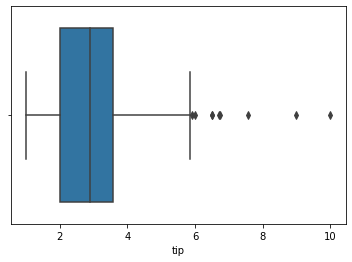

In [27]:
#3rd
sns.boxplot(data=tips,x='tip')
sortt =sorted(tips['tip'])
q1,q3 = np.percentile(sortt,[25,75])
iqr = q3-q1
print('IQR :',iqr)
lower_bound = q1-(iqr *1.5)
upper_bound = q3+(iqr*1.5)
print('LB: ',round(lower_bound,2),'\n',"UP: " ,round(upper_bound,2))

lower_bound is -0.34 and upper bound is 5.91, so anything outside of -0.34  and 5.91 is an outlier.

In [8]:
#4th
sort1 =sorted(tips['total_bill'])
q1,q3 = np.percentile(sort1,[25,75])
iqr = q3-q1
print('IQR :  ',iqr)
lower_bound = q1-(iqr *1.5)
upper_bound = q3+(iqr*1.5)
print('LB:  ',round(lower_bound,2),'\n',"UP: " ,round(upper_bound,2))

IQR :   10.779999999999998
LB:   -2.82 
 UP:  40.3


lower_bound is -2.82  and upper bound is 40.3, so anything outside of-2.82  and 40.3 is an outlier.

In [28]:
#5th
M = tips.groupby('sex').size()
F = tips['sex'].count()
p = (M/F)*100
print(p)
print('female=',p[1])

sex
Male      64.344262
Female    35.655738
dtype: float64
female= 35.65573770491803


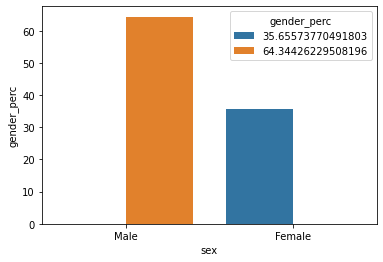

In [29]:
#6th
cnt = tips.groupby("sex").count().reset_index()

cnt['gender_perc'] = (cnt['total_bill']/len(tips))*100
cnt

sns.barplot(data=cnt,x='sex',y='gender_perc',hue='gender_perc');

In [30]:
#7
avg_tip = tips.groupby('sex').mean()

avg_tip['tip']

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

male give tip more then fema;e

In [31]:
#8
avg_tip = tips.groupby(['day','time']).mean()
avg_tip['tip']

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

during dinner time tips are more

In [32]:
#9
avg_tip = tips.groupby('size').mean()
avg_tip['tip']

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

AS NO. OF PEOPLE IN A TABLE INCREASE TIP INCREASES

In [33]:
#10
avg_tip = tips.groupby('smoker').sum()
avg_tip['tip']

smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64

u can clearly see non smokers tend to give more tips

In [17]:
#11
avg_tip = tips.groupby(['smoker','sex',]).mean() 
avg_tip['tip']

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [34]:
#12
tips['pct_tip']= tips['tip']/tips['total_bill']
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


In [35]:
#13
diff =tips.groupby(["sex"]).sum()
diff['pct_tip']

sex
Male      24.751136
Female    14.484694
Name: pct_tip, dtype: float64

In [36]:
#14
diff =tips.groupby(["size"]).sum()
diff['pct_tip']

size
1     0.869168
2    25.852194
3     5.781960
4     5.400113
5     0.707477
6     0.624917
Name: pct_tip, dtype: float64

yes it differs

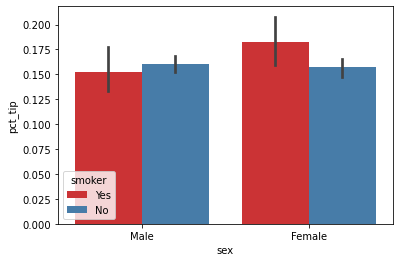

In [37]:
#15
sns.barplot(x='sex',y='pct_tip',hue="smoker",data=tips,palette='Set1');

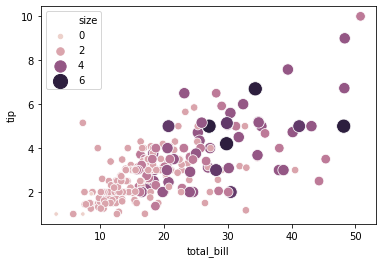

In [38]:
#16
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='size',size='size',sizes=(20,200));

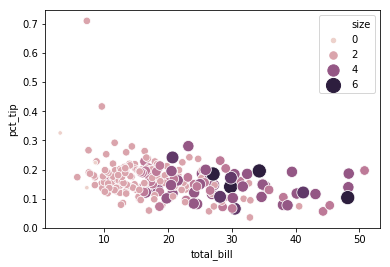

In [204]:
#17
#
sns.scatterplot(x='total_bill',y='pct_tip',data=tips,hue='size',size='size',sizes=(20,200));